In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/50_Startups.csv')


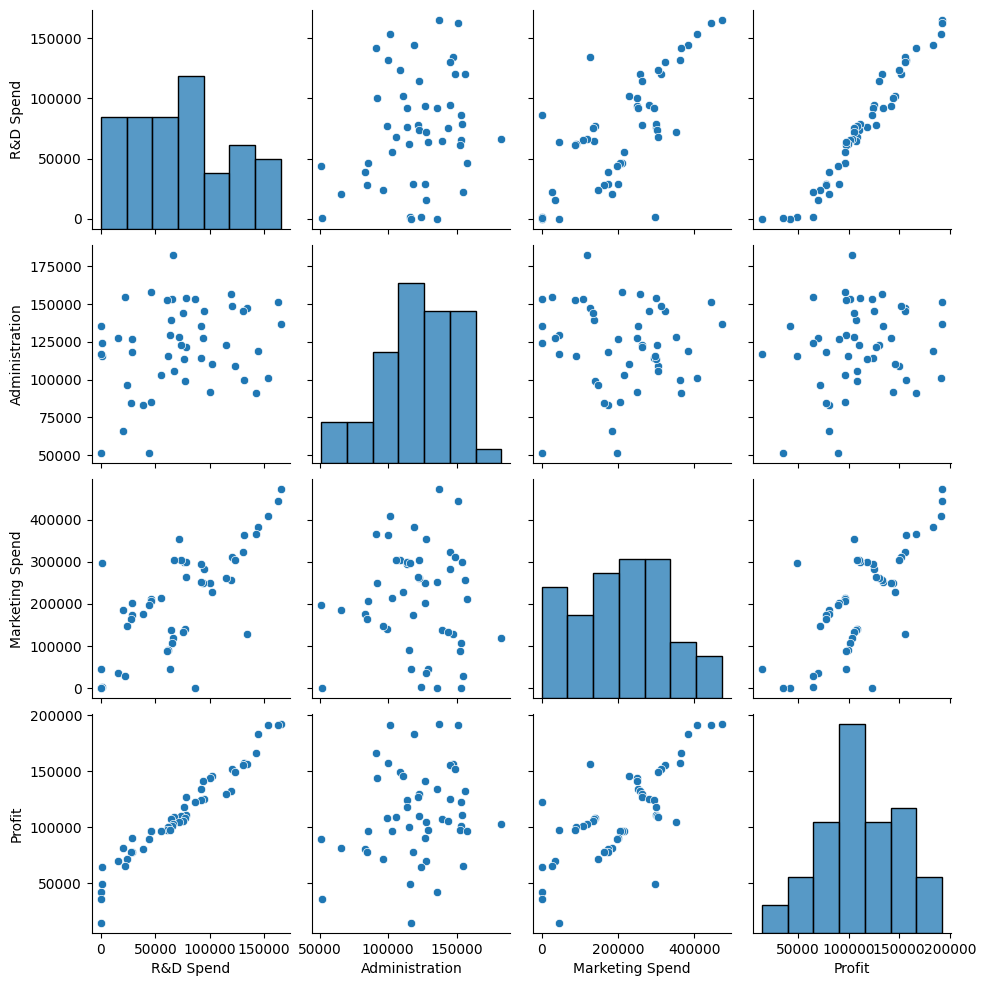

In [10]:
sns.pairplot(df)

<Axes: >

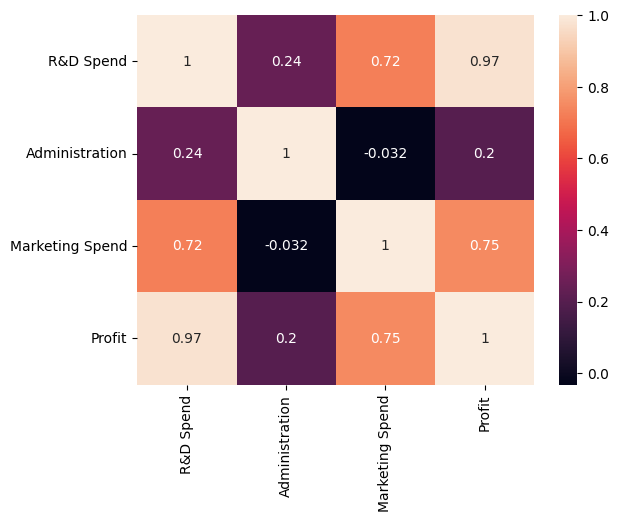

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [12]:
# Perform one-hot encoding on the 'State' column
df = pd.get_dummies(df, columns=['State'])

# Drop the rows with missing values
df.dropna(inplace=True)

# Split the dataset into X and y
X = df.drop(columns=['Profit'])
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

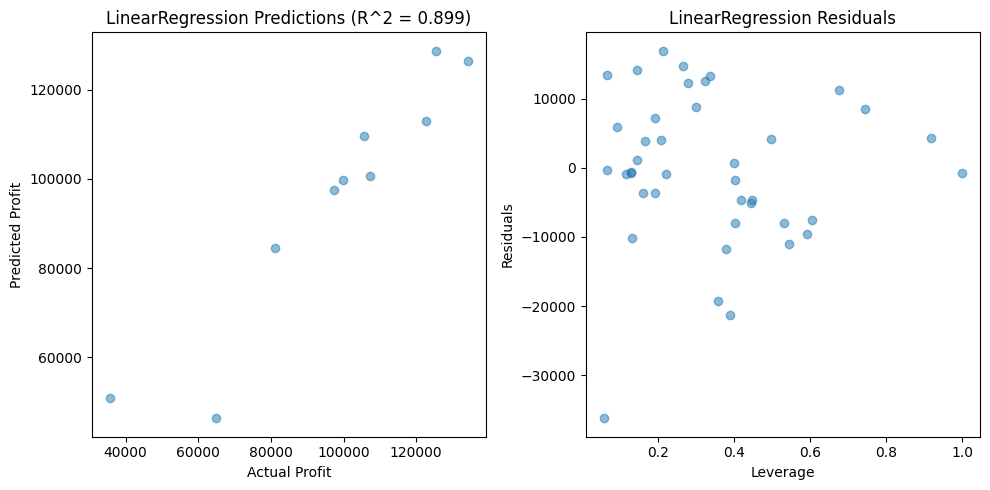

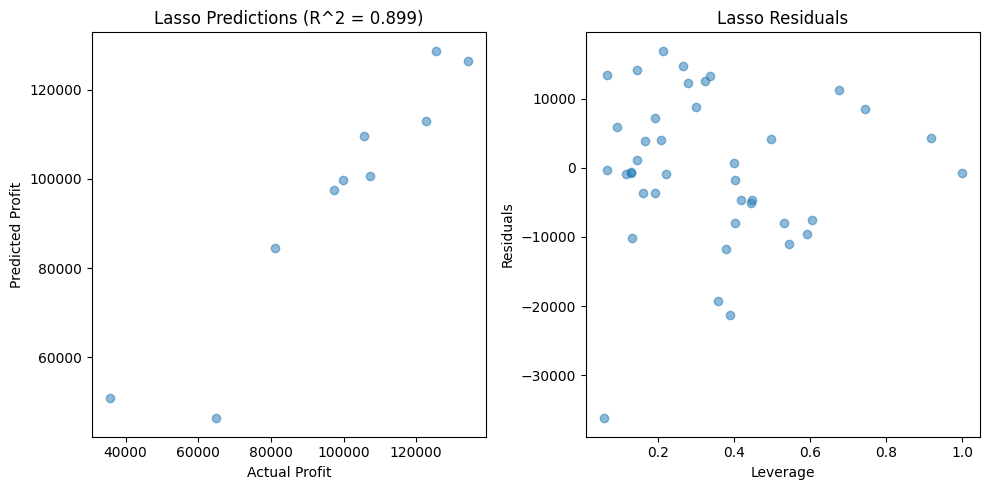

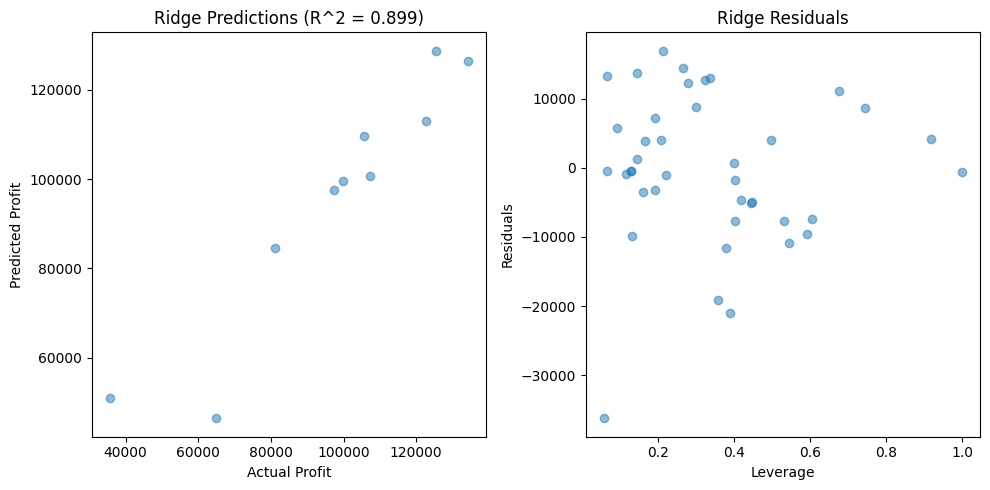

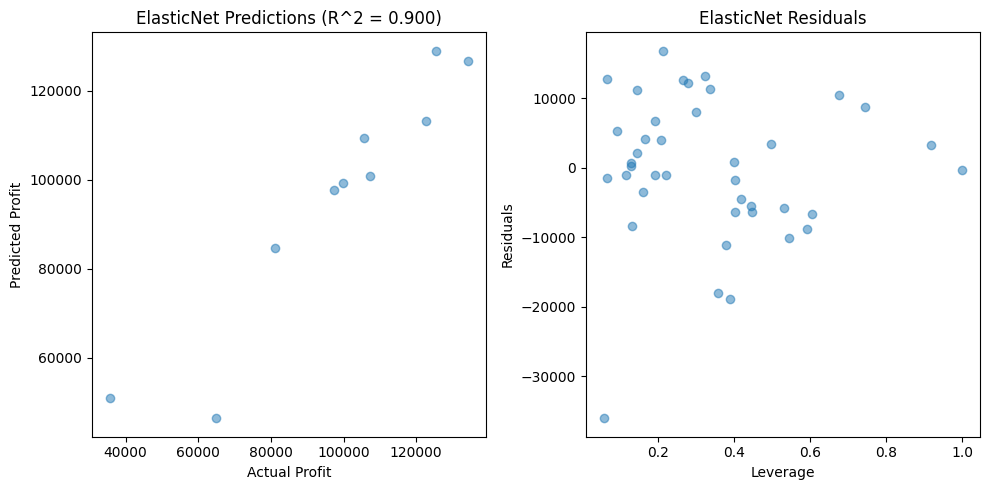

              Model       R^2
0  LinearRegression  0.932154
1             Lasso  0.932175
2             Ridge  0.933382
3        ElasticNet  0.939445


In [13]:
# Build the models and calculate R^2 values
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
]
r2_values = []
for model in models:
    # Model validation using cross-validation
    y_pred_train = cross_val_predict(model, X_train, y_train, cv=5)
    r2_train = r2_score(y_train, y_pred_train)
    r2_values.append(r2_train)
    
    # Model diagnostics
    # Check for outliers and influential points using leverage and residuals
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    residuals_train = y_train - y_pred_train
    leverage_train = np.sum(X_train ** 2, axis=1) / np.sum(X_train ** 2, axis=1).max()
    
    residuals_test = y_test - y_pred_test
    
    # Plot the results
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(y_test, y_pred_test, alpha=0.5)
    axs[0].set_xlabel('Actual Profit')
    axs[0].set_ylabel('Predicted Profit')
    axs[0].set_title(f'{model.__class__.__name__} Predictions (R^2 = {r2_test:.3f})')
    
    axs[1].scatter(leverage_train, residuals_train, alpha=0.5)
    axs[1].set_xlabel('Leverage')
    axs[1].set_ylabel('Residuals')
    axs[1].set_title(f'{model.__class__.__name__} Residuals')
    
    plt.tight_layout()
    plt.show()

# Create a table of R^2 values for each model
table = pd.DataFrame({'Model': [model.__class__.__name__ for model in models], 'R^2': r2_values})
print(table)